# Generate Li-cvK plots on all pathways

Plot all metabolic pathways without optimization of node positions. 

Using RECON3 as input. Not best pathway definition, but useful excercise. 

In [1]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import json

sys.path.append("/Users/lish/li.github/Li_CVK/lcvk")
from polarPlot import *
from metModels import *

In [ ]:
# Get metabolic model
# This is available at https://github.com/shuzhao-li/mummichog/tree/master/mummichog/tests/metabolicModel_RECON3D_20210510.json
model = json.load(open('../data/metabolicModel_RECON3D_20210510.json'))
print(model['meta_data'])
model = json_convert_azmuth_mummichog(model)
print(model.keys())

{'species': 'human', 'version': '', 'sources': ['https://github.com/VirtualMetabolicHuman, retrieved 2021-05-08'], 'status': '', 'last_update': '20210510', 'note': 'RECON3D cloned from https://github.com/VirtualMetabolicHuman, 2021-05-08.\nCompounds are decompartmentalized, but Reactions are not. \nThe redundant metabolites will be merged ad hoc when pathways and reactions are pulled.\n'}
dict_keys(['id', 'version', 'Compounds', 'dict_cpds_def', 'metabolic_rxns', 'cpd_edges', 'edge2rxn', 'rxn2edges', 'edge2enzyme', 'metabolic_pathways', 'cpd2pathways'])


In [ ]:
model['metabolic_pathways'][15]

In [4]:
model['cpd_edges'][288]

['nadph', 'nadp']

In [5]:
model['Compounds']['hs_pre15']

{'id': 'hs_pre15',
 'name': 'Heparan Sulfate, Precursor 15',
 'identifiers': {},
 'neutral_formula': '',
 'charge': -12,
 'charged_formula': 'C79H114N5O98S11X',
 'neutral_mono_mass': 0.0,
 'SMILES': '',
 'inchi': ''}

In [6]:
pathwayslist = model['metabolic_pathways']

In [7]:
[P['name'] for P in pathwayslist]

['Alanine and aspartate metabolism',
 'Alkaloid synthesis',
 'Aminoacyl-tRNA biosynthesis',
 'Aminosugar metabolism',
 'Androgen and estrogen synthesis and metabolism',
 'Arachidonic acid metabolism',
 'Arginine and proline metabolism',
 'Beta-Alanine metabolism',
 'Bile acid synthesis',
 'Biotin metabolism',
 'Blood group synthesis',
 'Butanoate metabolism',
 'C5-branched dibasic acid metabolism',
 'Cholesterol metabolism',
 'Chondroitin sulfate degradation',
 'Chondroitin synthesis',
 'Citric acid cycle',
 'CoA catabolism',
 'CoA synthesis',
 'Cytochrome metabolism',
 'D-alanine metabolism',
 'Dietary fiber binding',
 'Drug metabolism',
 'Eicosanoid metabolism',
 'Exchange/demand reaction',
 'Fatty acid oxidation',
 'Fatty acid synthesis',
 'Folate metabolism',
 'Fructose and mannose metabolism',
 'Galactose metabolism',
 'Glutamate metabolism',
 'Glutathione metabolism',
 'Glycerophospholipid metabolism',
 'Glycine, serine, alanine, and threonine metabolism',
 'Glycolysis/gluconeoge

In [8]:
# These pathways are in Recon3 more for modeling; not real metabolic pathways
# We don't consider compartments here
exclusion = [ 'Exchange/demand reaction',
 'Miscellaneous', 
 'Protein assembly',
 'Protein degradation',
 'Protein formation',
 'Protein modification',
'Transport, endoplasmic reticular',
 'Transport, extracellular',
 'Transport, golgi apparatus',
 'Transport, lysosomal',
 'Transport, mitochondrial',
 'Transport, nuclear',
 'Transport, peroxisomal',]
print("Number of imported pathways: ", len(pathwayslist))
pathwayslist = [P for P in pathwayslist if P['name'] not in exclusion]
print("After filtering: ", len(pathwayslist))

Number of imported pathways:  111
After filtering:  98


In [9]:
pathwayslist[11]['cpds'][:3]

['h', 'fad', 'b2coa']

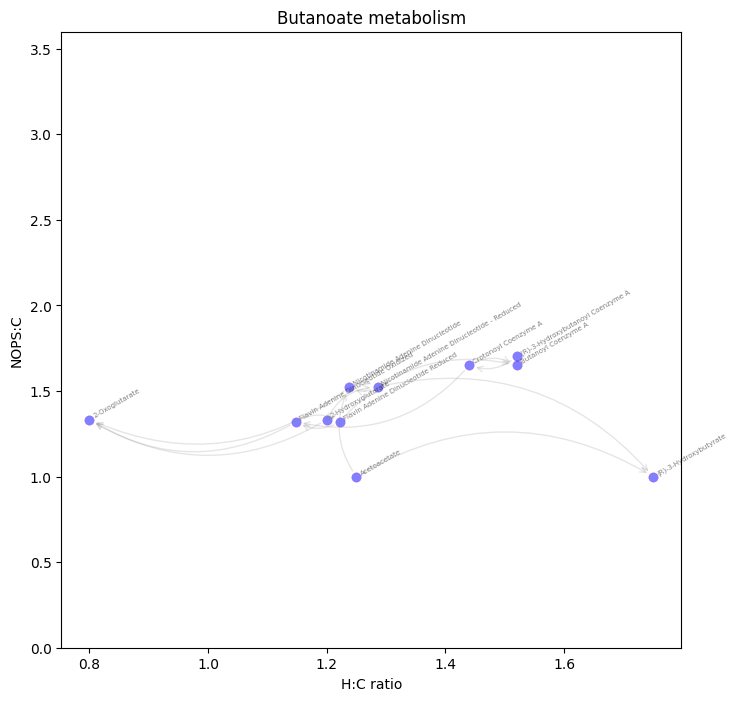

In [10]:
# Plot a test pathway using Cartesian coordiantes
pathway_nodes, pathway_edges = calculate_clean_network(
                [model['Compounds'][x] for x in pathwayslist[11]['cpds']], 
                pathwayslist[11]['edges'], formula='charged_formula')
plot_Cartesian_vkli_pathway(pathway_nodes, pathway_edges, title=pathwayslist[11]['name'], outfile='test11.pdf')

In [ ]:
# Do all pathways
outdir1 = '../output/labeled/'
outdir2 = '../output/nolabel/'

def clean_pathway_name(name):
    return name.replace('/', '_')

for P in pathwayslist: # [15: 20]:
    filename = clean_pathway_name(P['name'])
    pathway_nodes, pathway_edges = [model['Compounds'][x] for x in P['cpds']], P['edges']
    cplot_LCVK_pathway(pathway_nodes, pathway_edges, formula='charged_formula', cpd_name='id',
                       title=P['name'],  ydata='ratio_NOPS', 
                       width=8, height=8, fontsize=6,
                        rotation=30, show_names=True, 
                        outfile=outdir1+filename+'.pdf')
    cplot_LCVK_pathway(pathway_nodes, pathway_edges, formula='charged_formula', cpd_name='id',
                       title=P['name'],  ydata='ratio_NOPS', 
                       width=8, height=8, fontsize=6,
                        rotation=30, show_names=False, 
                        outfile=outdir2+filename+'.pdf')

## For Figure 1

Using 'Aminosugar metabolism' for illustration on Cartesian and Polar plots.

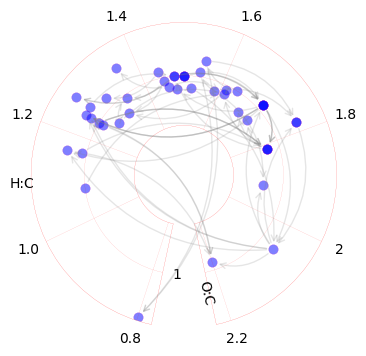

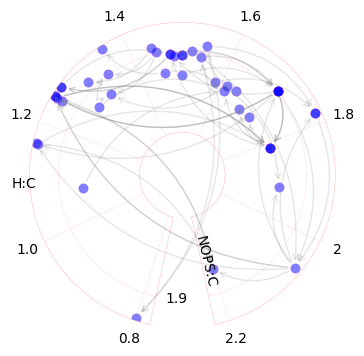

In [15]:
NNPP = 3
fsize = 8   # inch
P = pathwayslist[NNPP]
filename = clean_pathway_name(P['name'])
pathway_nodes, pathway_edges = [model['Compounds'][x] for x in P['cpds']], P['edges']
cplot_LCVK_pathway(pathway_nodes, pathway_edges, formula='charged_formula', cpd_name='id',
                    title='',  ydata='ratio_O_C', 
                    width=4, height=4, fontsize=6,
                    rotation=30, show_names=False, 
                    outfile= '../output/Fig1_Polar_OC_' +filename+'.pdf')
cplot_LCVK_pathway(pathway_nodes, pathway_edges, formula='charged_formula', cpd_name='id',
                    title='',  ydata='ratio_NOPS', 
                    width=4, height=4, fontsize=6,
                    rotation=30, show_names=False, 
                    outfile= '../output/Fig1_Polar_NOPS_' +filename+'.pdf')

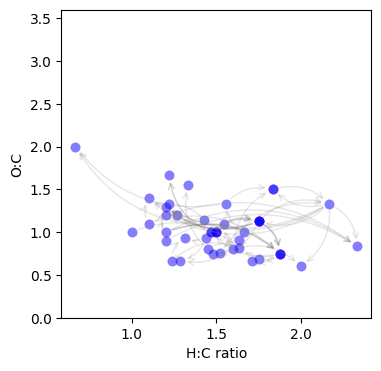

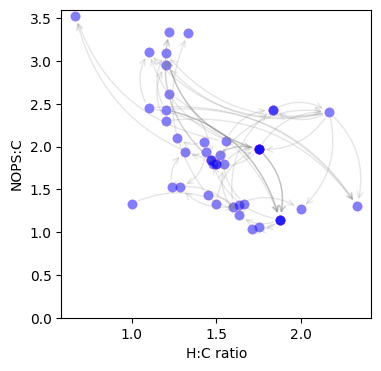

In [16]:
# 
pathway_nodes, pathway_edges = calculate_clean_network(
                [model['Compounds'][x] for x in pathwayslist[NNPP]['cpds']], 
                pathwayslist[NNPP]['edges'], formula='charged_formula')
plot_Cartesian_vkli_pathway(pathway_nodes, pathway_edges, title='',
                            ydata='ratio_O_C', 
                            width=4, height=4, fontsize=6,
                            rotation=30, show_names=False,
                            outfile='../output/Fig1_Cartesian_OC.pdf')
plot_Cartesian_vkli_pathway(pathway_nodes, pathway_edges, title='',
                            ydata='ratio_NOPS',
                            width=4, height=4, fontsize=6,
                            rotation=30, show_names=False,
                            outfile='../output/Fig1_Cartesian_NOPS.pdf')

# Conclusion

The van Krevelen diagram is useful for metabolic pathways. 

Two major changes from vK:
1. We use NOPS:C ratio instead of O:C by default. This gives better separation of nodes.
2. We use circular plot on a polar coordinate system. This organizes the edges better, and easier to reference.

Most pathway figures look decent without optimization. But it's easy to customize the figures.